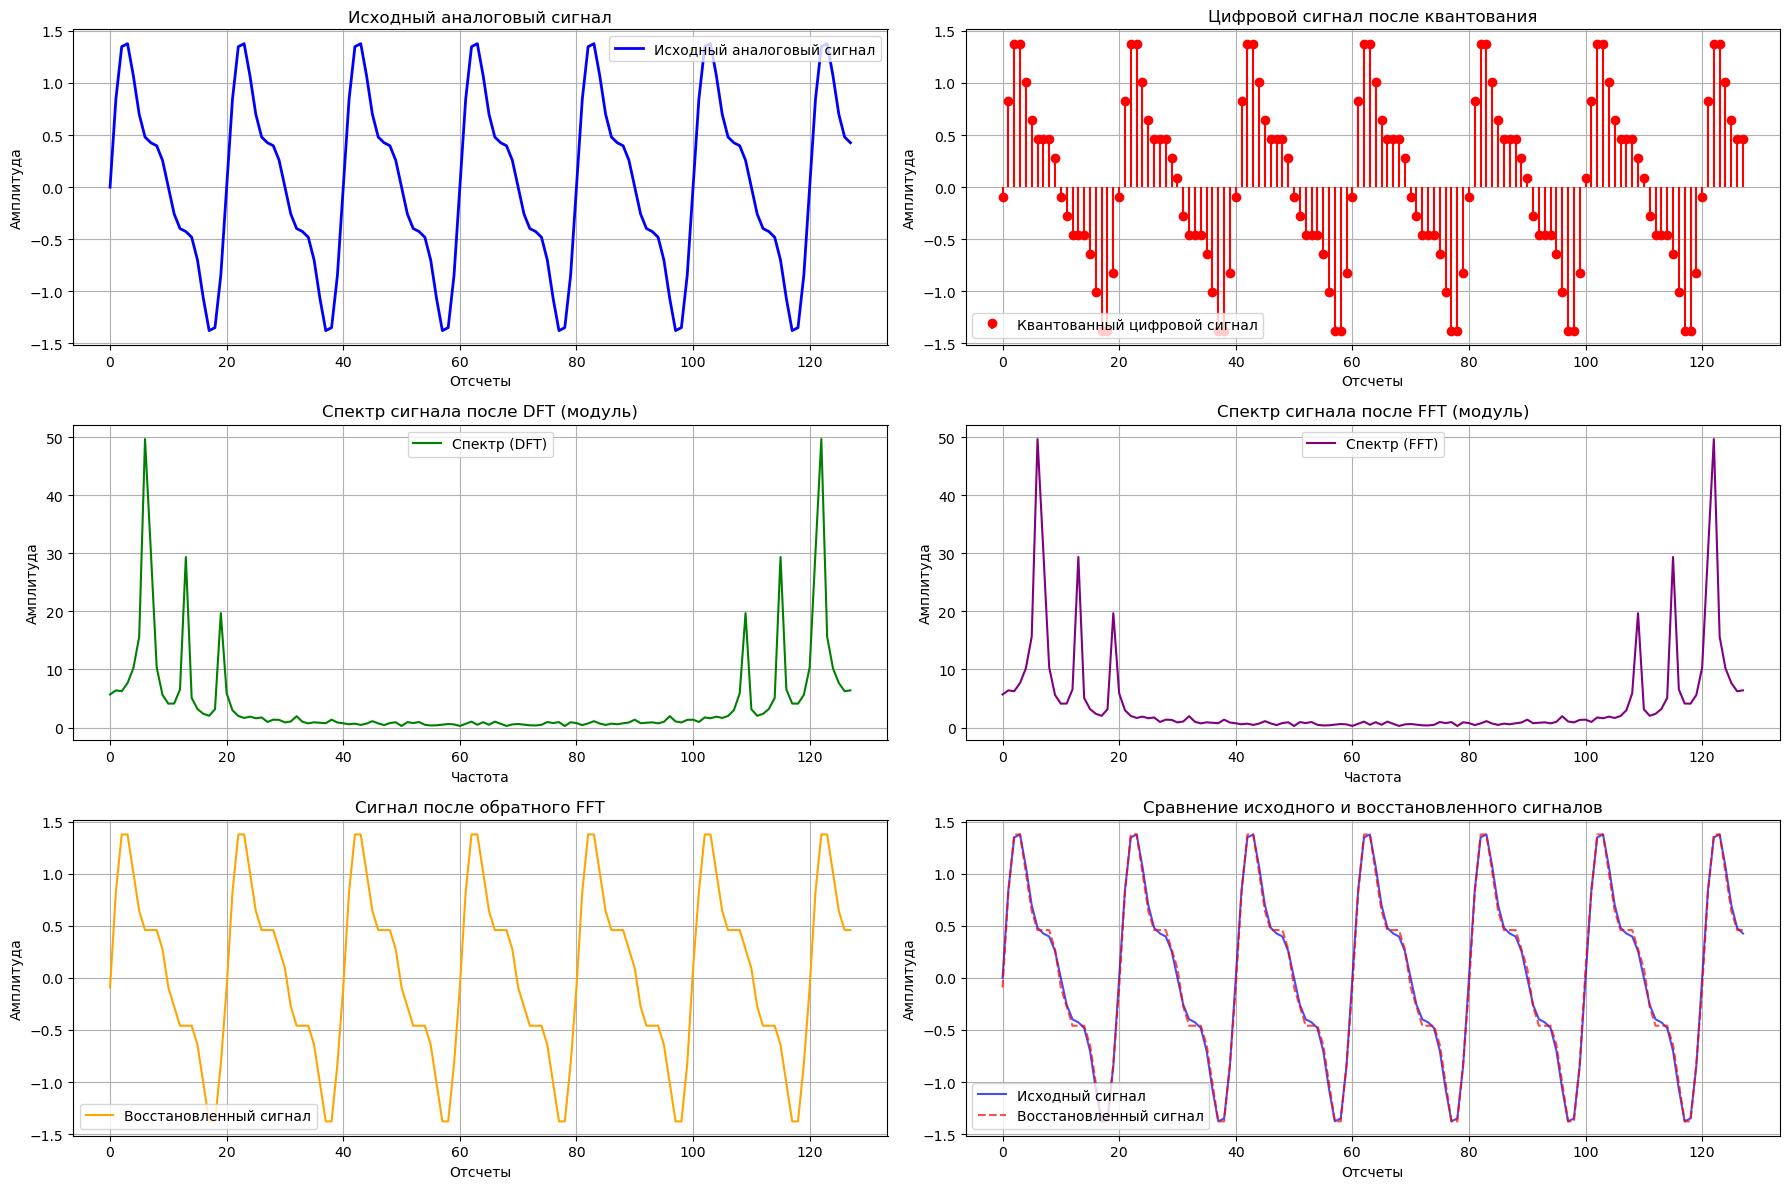

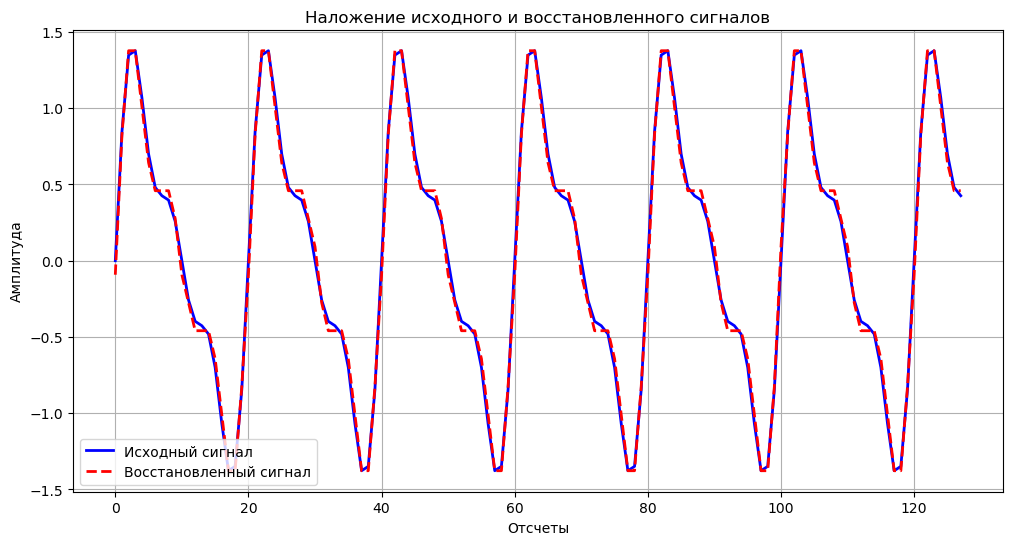

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Чтение данных из файлов
def read_complex_signal(filename):
    with open(filename, 'r') as file:
        data = [line.split() for line in file]
    return np.array([complex(float(re), float(im)) for re, im in data])

# Чтение данных
analog_signal = np.loadtxt('analog_signal.txt')
digital_signal = np.loadtxt('digital_signal.txt')
dft_result = read_complex_signal('dft_result.txt')
fft_result = read_complex_signal('fft_result.txt')
reconstructed_signal = np.loadtxt('reconstructed_signal.txt')

# Создаем фигуру с 6 графиками
plt.figure(figsize=(18, 12))
gs = GridSpec(3, 2, figure=plt.gcf())

# 1. Исходный аналоговый сигнал
ax1 = plt.subplot(gs[0, 0])
ax1.plot(analog_signal, label='Исходный аналоговый сигнал', color='blue', linewidth=2)
ax1.set_title('Исходный аналоговый сигнал')
ax1.set_xlabel('Отсчеты')
ax1.set_ylabel('Амплитуда')
ax1.grid(True)
ax1.legend()

# 2. Квантованный цифровой сигнал
ax2 = plt.subplot(gs[0, 1])
ax2.stem(digital_signal, linefmt='red', markerfmt='ro', basefmt=' ', label='Квантованный цифровой сигнал')
ax2.set_title('Цифровой сигнал после квантования')
ax2.set_xlabel('Отсчеты')
ax2.set_ylabel('Амплитуда')
ax2.grid(True)
ax2.legend()

# 3. Спектр после DFT (модуль)
ax3 = plt.subplot(gs[1, 0])
ax3.plot(np.abs(dft_result), label='Спектр (DFT)', color='green')
ax3.set_title('Спектр сигнала после DFT (модуль)')
ax3.set_xlabel('Частота')
ax3.set_ylabel('Амплитуда')
ax3.grid(True)
ax3.legend()

# 4. Спектр после FFT (модуль)
ax4 = plt.subplot(gs[1, 1])
ax4.plot(np.abs(fft_result), label='Спектр (FFT)', color='purple')
ax4.set_title('Спектр сигнала после FFT (модуль)')
ax4.set_xlabel('Частота')
ax4.set_ylabel('Амплитуда')
ax4.grid(True)
ax4.legend()

# 5. Восстановленный сигнал
ax5 = plt.subplot(gs[2, 0])
ax5.plot(reconstructed_signal, label='Восстановленный сигнал', color='orange')
ax5.set_title('Сигнал после обратного FFT')
ax5.set_xlabel('Отсчеты')
ax5.set_ylabel('Амплитуда')
ax5.grid(True)
ax5.legend()

# 6. Сравнение исходного и восстановленного сигналов
ax6 = plt.subplot(gs[2, 1])
ax6.plot(analog_signal, label='Исходный сигнал', color='blue', alpha=0.7)
ax6.plot(reconstructed_signal, label='Восстановленный сигнал', color='red', linestyle='--', alpha=0.7)
ax6.set_title('Сравнение исходного и восстановленного сигналов')
ax6.set_xlabel('Отсчеты')
ax6.set_ylabel('Амплитуда')
ax6.grid(True)
ax6.legend()

plt.tight_layout()
plt.show()

# Дополнительный график - только сравнение
plt.figure(figsize=(12, 6))
plt.plot(analog_signal, label='Исходный сигнал', color='blue', linewidth=2)
plt.plot(reconstructed_signal, label='Восстановленный сигнал', color='red', linestyle='--', linewidth=2)
plt.title('Наложение исходного и восстановленного сигналов')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.legend()
plt.show()